In [276]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [277]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_to_drug = pd.read_csv(mouse_drug_data_to_load)
mouse_to_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [278]:
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
clinical_trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [279]:
clinical_trial["Mouse ID"].value_counts()

g989    13
w422    10
m601    10
t451    10
a401    10
        ..
t573     1
l872     1
o848     1
h428     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [280]:
clinical_trial["Timepoint"].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [281]:
# Combine the data into a single dataset
combined = pd.merge(mouse_to_drug,clinical_trial,on="Mouse ID")

# Display the data table for preview
combined.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [282]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = combined.groupby(["Drug","Timepoint"])

In [283]:
# count how many drugs
mouse_to_drug["Drug"].value_counts()

Ramicane     25
Infubinol    25
Ketapril     25
Zoniferol    25
Capomulin    25
Placebo      25
Stelasyn     25
Propriva     25
Ceftamin     25
Naftisol     25
Name: Drug, dtype: int64

In [284]:
# Convert to DataFrame
drug_mouse_ct = pd.DataFrame(grouped["Mouse ID"].count())
drug_mouse_ct = drug_mouse_ct.rename(columns={"Mouse ID":"mice_count"})

# Preview DataFrame
drug_mouse_ct.head()

mice_count
Drug      Timepoint            
Capomulin 0                  25
          5                  25
          10                 25
          15                 24
          20                 23

In [285]:
drug_tumor_size = pd.DataFrame(grouped["Tumor Volume (mm3)"].mean())
drug_tumor_size = drug_tumor_size.rename(columns={"Tumor Volume (mm3)":"avg_tumor_size"})
drug_tumor_size.head()

avg_tumor_size
Drug      Timepoint                
Capomulin 0               45.000000
          5               44.266086
          10              43.084291
          15              42.064317
          20              40.716325

In [286]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
drug_tumor_size_st_err = pd.DataFrame(grouped["Tumor Volume (mm3)"].sem())
drug_tumor_size_st_err = drug_tumor_size_st_err.rename(columns={"Tumor Volume (mm3)":"standard_err_of_tumor_size"})
drug_tumor_size_st_err.head()

standard_err_of_tumor_size
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                            0.448593
          10                           0.702684
          15                           0.838617
          20                           0.909731

In [287]:
# merge all trial data 
# drug_mouse_ct
# drug_tumor_size
# drug_tumor_size_st_err

merge1 = pd.merge(drug_mouse_ct,drug_tumor_size,left_index=True,right_index=True)
merge1.head()

merged_final = pd.merge(merge1,drug_tumor_size_st_err,left_index=True,right_index=True)
merged_final.tail()
merged_final.head()

mice_count  avg_tumor_size  standard_err_of_tumor_size
Drug      Timepoint                                                        
Capomulin 0                  25       45.000000                    0.000000
          5                  25       44.266086                    0.448593
          10                 25       43.084291                    0.702684
          15                 24       42.064317                    0.838617
          20                 23       40.716325                    0.909731

In [288]:
# merged_final=merged_final.reset_index(inplace=False,drop=False)
# merged_final.head()

In [289]:
merge_selected = merged_final.loc[["Capomulin","Infubinol","Placebo","Ketapril"]]
print(merge_selected.shape)
merge_selected.tail(10)
merge_selected.head(10)

(40, 3)


mice_count  avg_tumor_size  standard_err_of_tumor_size
Drug      Timepoint                                                        
Capomulin 0                  25       45.000000                    0.000000
          5                  25       44.266086                    0.448593
          10                 25       43.084291                    0.702684
          15                 24       42.064317                    0.838617
          20                 23       40.716325                    0.909731
          25                 22       39.939528                    0.881642
          30                 22       38.769339                    0.934460
          35                 22       37.816839                    1.052241
          40                 21       36.958001                    1.223608
          45                 21       36.236114                    1.223977

In [290]:
# Generate the Plot (with Error Bars)

# x_axis = array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])
x_axis = np.arange(0,50,5)

# means = avg tumor size for all four drugs
cap_means = merge_selected.loc["Capomulin","avg_tumor_size"]
inf_means = merge_selected.loc["Infubinol","avg_tumor_size"]
ket_means = merge_selected.loc["Ketapril","avg_tumor_size"]
pla_means = merge_selected.loc["Placebo","avg_tumor_size"]

# standard error for all four drugs
cap_sd_err = merge_selected.loc["Capomulin","standard_err_of_tumor_size"]
inf_sd_err = merge_selected.loc["Infubinol","standard_err_of_tumor_size"]
ket_sd_err = merge_selected.loc["Ketapril","standard_err_of_tumor_size"]
pla_sd_err = merge_selected.loc["Placebo","standard_err_of_tumor_size"]

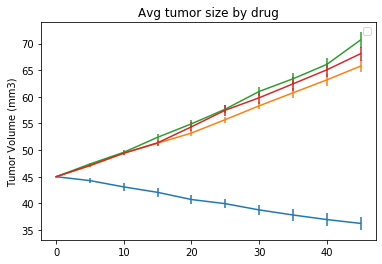

In [291]:
# Save the Figure
# legend didn't work

plt.title("Avg tumor size by drug")
plt.ylabel("Tumor Volume (mm3)")
cap,a,b = plt.errorbar(x_axis,cap_means,yerr=cap_sd_err)
inf,c,d = plt.errorbar(x_axis,inf_means,yerr=inf_sd_err)
ket,e,f = plt.errorbar(x_axis,ket_means,yerr=ket_sd_err)
pla,g,h = plt.errorbar(x_axis,pla_means,yerr=pla_sd_err)
plt.legend(handles=[cap,inf,ket,pla],loc="best")
plt.savefig("../Images/avg_tumor_size_by_drug.png")
plt.show()

## Metastatic Response to Treatment

In [292]:
# grouped = combined.groupby(["Drug","Timepoint"])
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

drug_mets = pd.DataFrame(grouped["Metastatic Sites"].mean())
drug_mets = drug_mets.rename(columns={"Metastatic Sites":"avg_mets_num"})
drug_mets.head()

avg_mets_num
Drug      Timepoint              
Capomulin 0              0.000000
          5              0.160000
          10             0.320000
          15             0.375000
          20             0.652174

In [293]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

drug_mets_num_st_err = pd.DataFrame(grouped["Metastatic Sites"].sem())
drug_mets_num_st_err= drug_mets_num_st_err.rename(columns={"Metastatic Sites":"standard_err_of_mets_num"})
drug_mets_num_st_err.head()

standard_err_of_mets_num
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.074833
          10                         0.125433
          15                         0.132048
          20                         0.161621

In [294]:
merge3=pd.merge(drug_mets,drug_mets_num_st_err,left_index=True,right_index=True)
merge3.head()

avg_mets_num  standard_err_of_mets_num
Drug      Timepoint                                        
Capomulin 0              0.000000                  0.000000
          5              0.160000                  0.074833
          10             0.320000                  0.125433
          15             0.375000                  0.132048
          20             0.652174                  0.161621

In [295]:
# create final df with all columns - drug, timepoint, # of living mice, tumor size, # of mets

merged_final2=pd.merge(merged_final,merge3,left_index=True,right_index=True)
merge_selected2=merged_final2.loc[["Capomulin","Infubinol","Placebo","Ketapril"]]
merge_selected2.shape

(40, 5)

In [296]:
merge_selected2.head(3)

mice_count  avg_tumor_size  standard_err_of_tumor_size  \
Drug      Timepoint                                                           
Capomulin 0                  25       45.000000                    0.000000   
          5                  25       44.266086                    0.448593   
          10                 25       43.084291                    0.702684   

                     avg_mets_num  standard_err_of_mets_num  
Drug      Timepoint                                          
Capomulin 0                  0.00                  0.000000  
          5                  0.16                  0.074833  
          10                 0.32                  0.125433

In [297]:
# Generate the Plot (with Error Bars)

# x_axis = array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])
x_axis = np.arange(0,50,5)

# means = avg mets num for all four drugs
cap_mets = merge_selected2.loc["Capomulin","avg_mets_num"]
inf_mets = merge_selected2.loc["Infubinol","avg_mets_num"]
ket_mets = merge_selected2.loc["Ketapril","avg_mets_num"]
pla_mets = merge_selected2.loc["Placebo","avg_mets_num"]

# standard error for all four drugs
cap_mets_sd_err = merge_selected2.loc["Capomulin","standard_err_of_mets_num"]
inf_mets_sd_err = merge_selected2.loc["Infubinol","standard_err_of_mets_num"]
ket_mets_sd_err = merge_selected2.loc["Ketapril","standard_err_of_mets_num"]
pla_mets_sd_err = merge_selected2.loc["Placebo","standard_err_of_mets_num"]

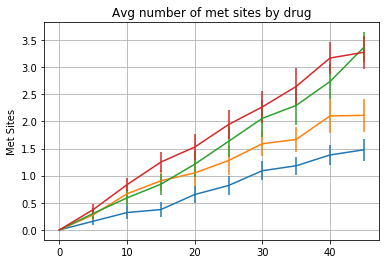

In [298]:
plt.title("Avg number of met sites by drug")
plt.ylabel("Met Sites")
plt.errorbar(x_axis,cap_mets,yerr=cap_mets_sd_err)
plt.errorbar(x_axis,inf_mets,yerr=inf_mets_sd_err)
plt.errorbar(x_axis,ket_mets,yerr=ket_mets_sd_err)
plt.errorbar(x_axis,pla_mets,yerr=pla_mets_sd_err)
plt.grid()
plt.savefig("../Images/avg_num_of_met_sites_by_drug.png")
plt.show()

## Survival Rates

In [299]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
merge_selected2["percent_mice_alive_%"] = merge_selected2["mice_count"]/25*100
merge_selected2.head()

mice_count  avg_tumor_size  standard_err_of_tumor_size  \
Drug      Timepoint                                                           
Capomulin 0                  25       45.000000                    0.000000   
          5                  25       44.266086                    0.448593   
          10                 25       43.084291                    0.702684   
          15                 24       42.064317                    0.838617   
          20                 23       40.716325                    0.909731   

                     avg_mets_num  standard_err_of_mets_num  \
Drug      Timepoint                                           
Capomulin 0              0.000000                  0.000000   
          5              0.160000                  0.074833   
          10             0.320000                  0.125433   
          15             0.375000                  0.132048   
          20             0.652174                  0.161621   

                     percent_mice_alive_%  
Drug      Timepoint                        
Capomulin 0                         100.0  
          5                         100.0  
          10                        100.0  
          15                         96.0  
          20                         92.0

In [300]:
# Generate the Plot (Accounting for percentages)

# x_axis = array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])
x_axis = np.arange(0,50,5)

# means = avg mets num for all four drugs
cap_rates = merge_selected2.loc["Capomulin","percent_mice_alive_%"]
inf_rates = merge_selected2.loc["Infubinol","percent_mice_alive_%"]
ket_rates = merge_selected2.loc["Ketapril","percent_mice_alive_%"]
pla_rates = merge_selected2.loc["Placebo","percent_mice_alive_%"]

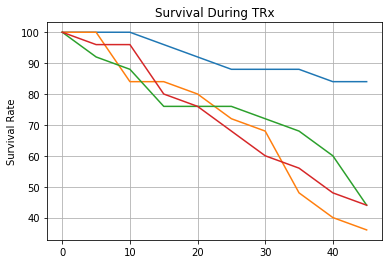

In [301]:
plt.title("Survival During TRx")
plt.ylabel("Survival Rate")
plt.plot(x_axis,cap_rates)
plt.plot(x_axis,inf_rates)
plt.plot(x_axis,ket_rates)
plt.plot(x_axis,pla_rates)
plt.grid()
plt.savefig("../Images/survival_rate_by_drug.png")
plt.show()

## Summary Bar Graph

In [302]:
merge_selected2.head()

mice_count  avg_tumor_size  standard_err_of_tumor_size  \
Drug      Timepoint                                                           
Capomulin 0                  25       45.000000                    0.000000   
          5                  25       44.266086                    0.448593   
          10                 25       43.084291                    0.702684   
          15                 24       42.064317                    0.838617   
          20                 23       40.716325                    0.909731   

                     avg_mets_num  standard_err_of_mets_num  \
Drug      Timepoint                                           
Capomulin 0              0.000000                  0.000000   
          5              0.160000                  0.074833   
          10             0.320000                  0.125433   
          15             0.375000                  0.132048   
          20             0.652174                  0.161621   

                     percent_mice_alive_%  
Drug      Timepoint                        
Capomulin 0                         100.0  
          5                         100.0  
          10                        100.0  
          15                         96.0  
          20                         92.0

In [303]:
# Calculate the percent changes for each drug
df = merge_selected2

cap_change = (df.loc["Capomulin",45]["avg_tumor_size"] - df.loc["Capomulin",0]["avg_tumor_size"])/df.loc["Capomulin",0]["avg_tumor_size"]
inf_change = (df.loc["Infubinol",45]["avg_tumor_size"] - df.loc["Infubinol",0]["avg_tumor_size"])/df.loc["Infubinol",0]["avg_tumor_size"]
ket_change = (df.loc["Ketapril",45]["avg_tumor_size"] - df.loc["Ketapril",0]["avg_tumor_size"])/df.loc["Ketapril",0]["avg_tumor_size"]
pla_change = (df.loc["Placebo",45]["avg_tumor_size"] - df.loc["Placebo",0]["avg_tumor_size"])/df.loc["Placebo",0]["avg_tumor_size"]


cap_change = cap_change * 100
inf_change = inf_change *100
ket_change = ket_change*100
pla_change = pla_change* 100

# Display the data to confirm
print(cap_change,inf_change,ket_change,pla_change)

-19.475302667894173 46.12347172785187 57.028794686606076 51.29796048315153


In [304]:
bar = (cap_change,inf_change,ket_change,pla_change)
x_axis = ("Capomulin","Infubinol","Ketapril","Placebo")

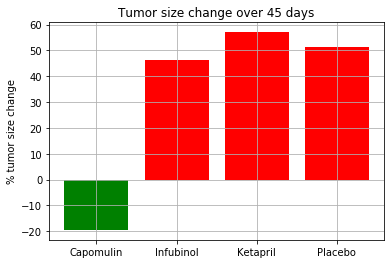

In [305]:
plt.bar(x_axis,bar,color=["g","r","r","r"],align="center")
plt.grid()
plt.title("Tumor size change over 45 days")
plt.ylabel("% tumor size change")
plt.savefig("../Images/Tumor_size_change_over_45_days_by_drug.png")
plt.show()